# Customer segmentation with unsupervised learning

__We will learn by doing__: you should complete with code the places marked with __[WORKSHOP]__

We will be using the following tools in Python 3:
* jupyter
* pandas
* matplotlib
* scikit-learn

## jupyter
You are already using __jupyter__!

__jupyter is a web-interface IDE__, a development enviroment __with REPL__ where you can execute arbitrary code and see the results instantly. Beneath the web interface there is a server that executes the code. The coding language is usually Python 3, but there are server's kerners for other languages.

Thanks to its REPL _powers_, __jupyter has became the facto standard format__ when showing data analysis, research papers and all data-related presentations. For us developers we could find jupyter as a too-simple IDE, but this simplicity is actually what helps researchers to __easily explore datasets__ and try things out quickly.

### jupyter notebook's cells

__A cell usually contains code or markdown__.

Here you have some ways to move around and execute a cell:
* You can edit any cell just clicking on it with the mouse, or use the keyboard arrows and do _Enter_
* You can unfocus a cell with _Esc_
* You can add a new cell with the key B (bellow) or 
* Executing a cell is simple: _shift+Enter_ or _control+Enter_ will run the code or render the markdown

You can use the mouse and the top menu to do all kind of things, or learn the keyboard shortcuts (in the Help menu).

In [1]:
# This is a cell with code. Try to execute it: use the mouse to focus it and press control+Enter.

' '.join(['Hello', 'world'])

'Hello world'

## pandas

__pandas is a library for manipulating data frames__. It is based in a smaller library, __Numpy__, which operates with matrices. But pandas leverages numpy giving an incredible collection of functions to play with the data.

Let's load ulabox's dataset and play a bit with the data. If the .csv file is not in the current directory, it will download it.

In order to know the meaning of each column of the dataset, please have a look at [its data dictionary](https://github.com/ulabox/datasets/blob/master/README.md).


In [2]:
# Usually 'pandas' is nicknamed as 'pd'.
# Please execute this cell with control+Enter (and the following ones, while you read them).
import pandas as pd
import os.path

filename = 'ulabox_orders_with_categories_partials_2017.csv'
if not os.path.isfile(filename):
    import urllib.request
    urllib.request.urlretrieve('https://raw.githubusercontent.com/ulabox/datasets/master/data/ulabox_orders_with_categories_partials_2017.csv', filename) 

raw_df = pd.read_csv(filename)   

# head() shows first 5 rows
raw_df.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


If you have a look at the raw data, __each row has an index__ (left, bold) __with its corresponding column data__. In data analysis rows are usually named "samples" while columns are named "features".

Actually in this case __the feature "order" (order number) could be directly used as the index__ of the dataframe. So let's use it and then drop the original "order" column.

In [3]:
df = raw_df.reindex(index=raw_df['order'])

df.drop('order', axis=1, inplace=True)

df.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


Notice that __pandas library is really powerfull__. It can manipulate data in different ways and allows all kind of dataframe operations (at cell level, row and column level, and even between dataframes).

For example, it can use multi-indexes as follows.

In [4]:
multi_indexed_df = raw_df.groupby(by=['customer','order']).sum()

multi_indexed_df.head()

total_items  discount%  weekday  hour  Food%  Fresh%  Drinks%  \
customer order                                                                  
0        0               45      23.03        4    13   9.46   87.06     3.48   
         1               38       1.22        5    13  15.87   75.80     6.22   
         2               51      18.08        4    13  16.88   56.75     3.37   
1        3               57      16.51        1    12  28.81   35.99    11.78   
         4               53      18.31        2    11  24.13   60.38     7.78   

                Home%  Beauty%  Health%  Baby%  Pets%  
customer order                                         
0        0       0.00     0.00     0.00    0.0    0.0  
         1       2.12     0.00     0.00    0.0    0.0  
         2      16.48     6.53     0.00    0.0    0.0  
1        3       4.62     2.87    15.92    0.0    0.0  
         4       7.72     0.00     0.00    0.0    0.0

Filtering, sampling and __indexing by sample or a feature__ is really easy too.

In [5]:
# Get 50 random rows
sample = df.sample(50, random_state = 1)
# I use random_state to get same results (it's the random seed)

sample.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
10747,3657,45,7.99,1,20,35.44,18.43,23.96,1.00,3.46,0.00,17.72,0.00
12573,4230,55,21.70,2,13,9.60,41.92,16.11,15.74,0.00,0.48,0.00,16.14
29676,10079,1,0.00,1,13,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
8856,3062,28,4.68,2,13,84.92,0.00,10.55,0.00,4.54,0.00,0.00,0.00
21098,7054,18,8.62,1,8,25.64,19.87,0.00,20.31,34.17,0.00,0.00,0.00


In [6]:
# Getting a column (feature)
column = sample['total_items']

column.head()

order
10747    45
12573    55
29676     1
8856     28
21098    18
Name: total_items, dtype: int64

In [7]:
# Getting a row (sample)
sample.loc[8856]

customer       3062.00
total_items      28.00
discount%         4.68
weekday           2.00
hour             13.00
Food%            84.92
Fresh%            0.00
Drinks%          10.55
Home%             0.00
Beauty%           4.54
Health%           0.00
Baby%             0.00
Pets%             0.00
Name: 8856, dtype: float64

In [8]:
# Getting an individual value
sample.loc[8856, 'hour']

13.0

In [9]:
# Filtering with direct test
orders_with_more_than_50_items = sample.loc[sample['total_items'] > 50]

orders_with_more_than_50_items.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
12573,4230,55,21.70,2,13,9.60,41.92,16.11,15.74,0.00,0.48,0.00,16.14
12789,4303,58,3.10,1,11,15.89,8.76,45.12,18.15,0.00,0.00,12.08,0.00
537,124,141,4.44,6,23,23.00,52.97,15.39,0.00,8.63,0.00,0.00,0.00


In [10]:
# Notice the content of the previous comparison
(sample['total_items'] > 50).head()

order
10747    False
12573     True
29676    False
8856     False
21098    False
Name: total_items, dtype: bool

In [11]:
# [WORKSHOP] Can you find any order with only Drink products bought?
sample.loc[sample['Drinks%'] == 100]

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,,,,,,
29676,10079,1,0.0,1,13,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
6141,2074,36,0.1,2,17,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0


You should have found more than one order with just drinks. Somebody was really thirsty!

Moreover __pandas have several functions for doing statistics__, helpfull when exploring the data.

In [12]:
df.describe()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


As you can see, the dataset contains 30k rows (samples). We get the mean, min, max and other statistics for each feature.

Wait a moment! __Look at the discount% column__. It seems the maximum _discount%_ is 100%, and the minimum _discount%_ is (minus) -65%!! __This looks weird...__

If you want to have a look at other pandas features, I recommend [its documentation](https://pandas.pydata.org/pandas-docs/stable/) and [this cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).

## matplotlib
__matplotlib is a library for graphs__. It can use numpy arrays and pandas dataframes as input.

For instance, let's explore the discount% feature using a histogram.

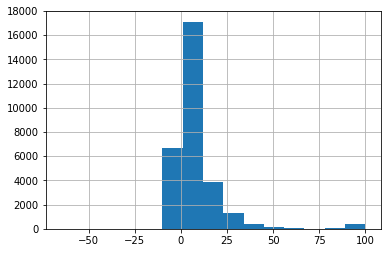

In [13]:
import matplotlib.pyplot as plt

# This is a jupyter helper, so when a matplotlib is evaluated, it shows the graph
%matplotlib inline

# Use 15 blocks(bins)
df['discount%'].hist(bins=15)

After seeing the discount% feature displayed, it's clear that if the __discount% is 100%__, it should be some kind of __free order__ (like a gift for a VIP).

On the other hand, why are there some negative discount% values? This is not easy to understand until you ask the domain expert: some drinks have a surcharge (a negative discount) due to a law that taxes drinks with added sugar.

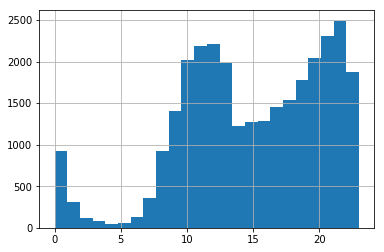

In [14]:
# [WORKSHOP] Plot a histogram to display the most common hours of the day orders are purchased. 
df['hour'].hist(bins=24)

If you want to learn more about matplotlib, check [pandas visualization documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html) and [matplotlib documentation](https://matplotlib.org/contents.html).

## scikit-learn

__scikit-learn is a library with machine learning algorithms__ and helpers.

Before starting using ML algorithms, let's __prepare a smaller dataset without free orders__, with just 100 rows, and consider only the 8 categories' partials.

Notice that algorithms are optimized to work better with values between 0 to 1; __it's vital to keep values at this order of magnitude__. So an easy way to normalize the samples' data is to divide the percents values by 100. Another option could be using Standarization (see [documentation](http://scikit-learn.org/stable/modules/preprocessing.html])).

In ML jargon, the algorithm input is called __X__ (a matrix with samples and features).

In [15]:
no_free_orders = df.loc[df['discount%'] < 100]
one_thousand = no_free_orders.sample(100, random_state = 1)
X = one_thousand[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']].divide(100)

X.head()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
order,,,,,,,,
15987,0.3468,0.0000,0.3176,0.3094,0.0263,0.0,0.0000,0.0
5936,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0
17612,0.2606,0.0000,0.2633,0.1342,0.0000,0.0,0.3418,0.0
24720,0.0239,0.4836,0.1137,0.3789,0.0000,0.0,0.0000,0.0
22232,0.1257,0.6472,0.2059,0.0212,0.0000,0.0,0.0000,0.0


### KMeans clustering

scikit-learn comes with a k-means clustering algorithm with only one mandatory parameter: the number of expected clusters. Let's try with 7 clusters.

All algorithms in this library come with a .fit_predict() method to do the training.

In [16]:
from sklearn.cluster import KMeans

seven_clusters_alg = KMeans(n_clusters = 7, random_state = 1)
cluster_labels = seven_clusters_alg.fit_predict(X)
cluster_labels

array([3, 4, 3, 1, 6, 2, 6, 3, 4, 6, 0, 1, 1, 2, 1, 2, 0, 3, 0, 1, 1, 2, 3,
       3, 3, 4, 1, 0, 4, 1, 3, 3, 0, 3, 5, 1, 4, 1, 3, 1, 1, 4, 2, 3, 0, 6,
       5, 3, 1, 3, 0, 3, 1, 2, 6, 1, 1, 0, 4, 0, 3, 1, 1, 1, 3, 1, 4, 6, 1,
       4, 1, 2, 3, 6, 1, 3, 3, 4, 1, 3, 3, 3, 0, 1, 4, 1, 3, 0, 0, 1, 0, 1,
       1, 5, 1, 5, 1, 5, 1, 4], dtype=int32)

As you see, each one of the 100 samples is classified in a cluster (from 0 to 6).

Let's see how many samples felt in each cluster.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f320b4330f0>]], dtype=object)

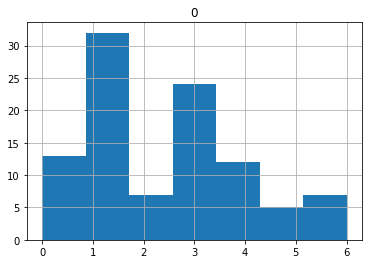

In [17]:
# cluster_labels is a numpy array, so first we embed it in a dataframe and then plot each cluster counting
pd.DataFrame(cluster_labels).hist(bins = 7)

As you see, cluster #1 and #3 have quite a lot of samples, while cluster #5 has just 5 samples.

Was choosing 7 clusters a good idea? __How can we find the more balanced amount of clusters?__ Silhouette score to the rescue!

scikit-learn comes with a [silhouette_score function](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), that evaluates how well the samples felt in the clusters. Its result is a score, the higher value the better. If you want to understand this function better, have a look at [the visual example that comes with its documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

In our case, let's do a small script to try different amount of clusters, from 2 to 20, to see the score of each case.

In [18]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,20)

for n_clusters in range_n_clusters:
    cluster_alg = KMeans(n_clusters = n_clusters, random_state = 1)
    cluster_labels = cluster_alg.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.209614580674
For n_clusters = 3 The average silhouette_score is : 0.279697267986
For n_clusters = 4 The average silhouette_score is : 0.309569371964
For n_clusters = 5 The average silhouette_score is : 0.328202008154
For n_clusters = 6 The average silhouette_score is : 0.354079181771
For n_clusters = 7 The average silhouette_score is : 0.324515358682
For n_clusters = 8 The average silhouette_score is : 0.32765910155
For n_clusters = 9 The average silhouette_score is : 0.298035520382
For n_clusters = 10 The average silhouette_score is : 0.312711363902
For n_clusters = 11 The average silhouette_score is : 0.289352747521
For n_clusters = 12 The average silhouette_score is : 0.306856929345
For n_clusters = 13 The average silhouette_score is : 0.29406721323
For n_clusters = 14 The average silhouette_score is : 0.313353132715
For n_clusters = 15 The average silhouette_score is : 0.292885947328
For n_clusters = 16 The average silhouette_s

Apparently choosing 7 clusters was a quite good guess, but the best score is for 6 clusters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f320a820ac8>]], dtype=object)

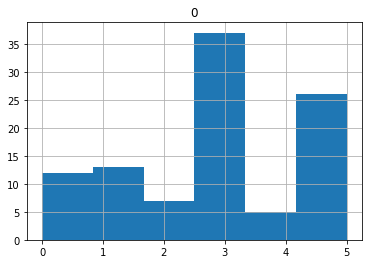

In [19]:
# [WORKSHOP] Use KMeans algorithm with 6 clusters (and random_state = 1), and plot clusters' histogram (with 6 bins)
six_clusters_alg = KMeans(n_clusters = 6, random_state = 1)
cluster_labels = six_clusters_alg.fit_predict(X)
pd.DataFrame(cluster_labels).hist(bins = 6)

Changing from 7 clusters to 6 doesn't look a big improvement, but we have to believe in the score ;-)

A good way to understand better those 6 clusters is to see their centers.

In [20]:
six_clusters_alg = KMeans(n_clusters = 6, random_state = 1)
cluster_labels = six_clusters_alg.fit_predict(X)

centers = pd.DataFrame(six_clusters_alg.cluster_centers_, columns=X.columns)
centers.multiply(100).round(0)

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,65.0,8.0,14.0,5.0,3.0,3.0,-0.0,2.0
1,15.0,6.0,68.0,7.0,1.0,2.0,0.0,-0.0
2,2.0,6.0,3.0,2.0,2.0,0.0,85.0,0.0
3,19.0,50.0,13.0,8.0,3.0,2.0,0.0,2.0
4,3.0,1.0,5.0,85.0,6.0,0.0,0.0,0.0
5,24.0,12.0,24.0,23.0,9.0,2.0,6.0,0.0


Looking at the 6 clusters' centers everything makes more sense. Let's see what it is bought in each one:
* #0 food and some drinks, "_the food lover_"
* #1 drinks and some food, "_the thirsty_"
* #2 basically baby stuff, "_the parent_"
* #3 fresh, food and drink, "_the healthy_"
* #4 home products, "_the cleaner_"
* #5 a bit of everything, "_the balanced_"

Notice too that some features are totally irrelevant: Health% and Pets%. So we can consider ignoring them in the future.

### DBSCAN clustering

Another algorithm for clustering is DBSCAN. Let's try it!

In [21]:
from sklearn.cluster import DBSCAN
# Let's ask for at least 3 samples in each cluster, with a maximum of 0.3 distance
dbscan_alg = DBSCAN(eps = 0.3, min_samples = 3)
cluster_labels = dbscan_alg.fit_predict(X)
cluster_labels

array([ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  0])

Ouch! This algorithm only found 3 clusters (#0, #1 and #2) and some samples are marked as outsiders (#-1).

Let's try to remove Health% and Pets% as we have seen those features are irrelevant.

In [22]:
X2 = X[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Baby%']]
cluster_labels = dbscan_alg.fit_predict(X2)
cluster_labels

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0])

Well, that has improved a bit. But still has space for improvement...

In [23]:
# [WORKSHOP] Feel free to try alternative configurations for this algorithm...

# Thank you for attending this workshop!

As you have experienced, playing with Machine Learning algorithms is a question of spending time learning about the data and finding the correct parameters. Also notice that we were working with just 100 samples... things can get slow with real _big data_.

I hope you liked this workshop!